<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_LSTM_Stocks_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 63kB/s 
     |████████████████████████████████| 3.1MB 53.8MB/s 
     |████████████████████████████████| 501kB 49.3MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
import math
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, GaussianNoise, BatchNormalization, MaxPooling2D, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
from scipy import stats

### Loading & Transforming Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [8]:
df.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.92,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.26,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.00,28.275,27.975,28.130,8665592,SBUX


In [9]:
df.tail(3)

,date,open,high,low,close,volume,Name
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [0]:
series = df['close'].values.reshape(-1, 1)

In [11]:
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [0]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [0]:
# previous timesteps = T
T = 10
X = []
y = []

for t in range (len (series) - T) :
  y.append (series[t + T])
  X.append (series[t:t+T])

X = np.asarray (X).reshape (-1, T, 1)
y = np.asarray (y)
N = len (X)

In [0]:
cot = np.int (np.floor (N * (3/4)))

X_train = X[:cot]
X_test = X[cot:]
y_train = y[:cot]
y_test = y[cot:]

### Model Building

In [0]:
i =  Input (shape=(T,1))

x = LSTM (128, activation='tanh') (i)
x = Dense (64)(x)
x = Dropout (0.25)(x)
x = Dense (1)(x)

In [0]:
model = Model (i, x)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.05, decay=5e-5)

In [0]:
model.compile (optimizer=adam,
                    loss='mse')

In [0]:
epochs = 100

In [0]:
r = model.fit (X_train, y_train, epochs=epochs, verbose=False, validation_data=(X_test, y_test))

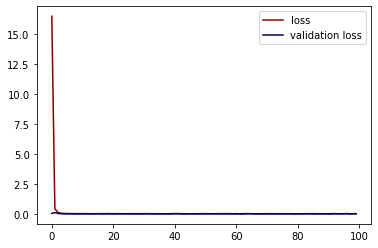

In [40]:
plt.plot (r.history['loss'], label='loss', color='#840000')
plt.plot (r.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

### Forecasting

In [41]:
len(X_test)

313

In [47]:
X_test[], y_test[0]

(array([2.22407801]), 2.2182537849455106)

In [0]:
array = X_train[-1:]
y_hats = []
for c in range (313):
  y_hat = model.predict(array)[0,0]
  y_hats.append (y_hat)
  sliced = array.reshape (-1,10).tolist()[0][1:]
  sliced.append (y_hat)
  array = np.asarray (sliced).reshape (-1,10).transpose().reshape(-1,10,1)
  # print (array)

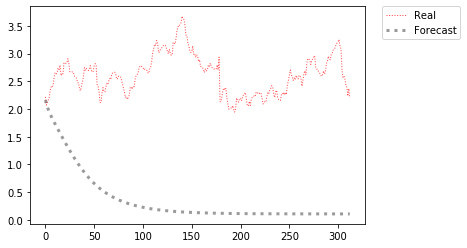

In [44]:
plt.plot(y_test, color='#ff474c', label='Real', linewidth=1, linestyle=':')
plt.plot(y_hats, color='#363737', label='Forecast', linewidth=3, linestyle=':', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()